## BnB DFS ##

In [1]:
import numpy as np
import random 
import pandas as pd
import matplotlib.pyplot as plt

# pg 182

def DFS(dist_mat, start):
    
    def NN(state):

        dist_mat_tilde = dist_mat.copy().to_numpy()
        dist_mat_tilde[state[:-1]] = 10**9
        dist_mat_tilde[:,state[:-1]] = 10**9
        np.fill_diagonal(dist_mat_tilde, 10**9)
        
        cost = 0
        next = state[-1]
        iter = 0

        while iter <= len(dist_mat) - len(state) - 1:

            ind = dist_mat_tilde[next,:].argmin() # city with min dist from current
            cost_new = dist_mat_tilde[next,ind]
            dist_mat_tilde[:,next] = 10**9
            cost += cost_new
            next = ind
            iter += 1
            
        return cost + dist_mat.loc[next,state[0]]
        
    def objective_function(state):
        
        # nearest neighbors heuristic
        h = NN(state)
        
        if len(state) <= 2:
            return U
        
        cost = h

        for i in range(len(state) - 2):
            cost += dist_mat.loc[state[i], state[i+1]]
        cost += dist_mat.loc[state[-2],state[-1]]

        # add zero onto the end
        if len(state) == len(dist_mat):
            cost += dist_mat.loc[state[-1], 0]
        return cost
    
    # appends newly generated nodes to frontier
    def gen_front(current, frontier, N):

        nums = [i for i in range(N)]
        
        for y in current:
            if y in nums:
                nums.remove(y)
        for i in range(len(nums)):
            t = current[:]
            t.append(nums[i])
            frontier.append(t)
        return frontier
    
    cost_array = []
    best_path = []
    best_dist = 0
    
    frontier = [start]    
    N = len(dist_mat)
    U = 10**9 # initial bound 
    
    while frontier != []:
        new_path = frontier.pop()
        path_cost = objective_function(new_path)
        
        if path_cost > U:
            continue
            
        # we have a complete path    
        elif len(new_path) == N:
            U = path_cost
            best_path = new_path
            best_dist = path_cost
            cost_array.append(path_cost)
            best_path.append(0)
        else:
            frontier = gen_front(new_path, frontier, N)
            
    plt.plot(cost_array)
    plt.title('Progression path cost')
    plt.ylabel('Cost')
    plt.xlabel('Iteration')
    
    return best_path, best_dist

([0,
  26,
  10,
  16,
  22,
  18,
  17,
  12,
  24,
  8,
  29,
  20,
  15,
  7,
  19,
  9,
  28,
  11,
  3,
  1,
  5,
  27,
  13,
  14,
  23,
  21,
  6,
  2,
  4,
  25,
  0],
 910.0)

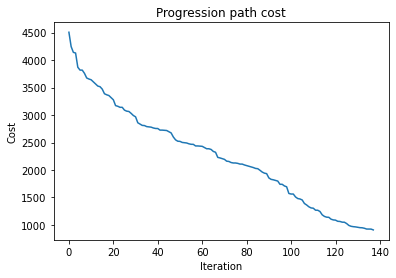

In [5]:
import numpy as np
import pandas as pd

def write_distance_matrix(n, mean, sigma):
    distance_matrix = np.zeros((n, n))
    random_distance = []
    num_distance = int(n * (n-1) / 2)
    for _ in range(num_distance):
        distance = 0
        while distance <= 0:
            distance = np.random.normal(mean, sigma)

        random_distance.append(round(distance))
    
    iu = np.triu_indices(n, 1)
    distance_matrix[iu] = random_distance
    distance_matrix += distance_matrix.T

    return distance_matrix
    

mean = 100
sigma = 100
N = 30
start = [0]
distance_matrix = pd.DataFrame(write_distance_matrix(N, mean, sigma))

DFS(distance_matrix, start)